In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def rz(angle):
    angle=np.deg2rad(angle)
    array=np.array([[np.cos(angle), np.sin(angle), 0], [-1*np.sin(angle), np.cos(angle), 0], [0,0,1]])
    return(array)
def ry(angle):
    angle=np.deg2rad(angle)
    array=np.array([[np.cos(angle),0,-1*np.sin(angle)], [0,1,0], [np.sin(angle), 0, np.cos(angle)]])
    return(array)
def euler_angle2matrix(rot,tilt,psi):
    a1, a2, a3 = np.deg2rad(rot), np.deg2rad(tilt), np.deg2rad(psi)
    c1 = np.cos(a1)
    c2 = np.cos(a2)
    c3 = np.cos(a3)
    s1 = np.sin(a1)
    s2 = np.sin(a2)
    s3 = np.sin(a3)
    array=np.array([[c3*c2*c1-s3*s1, c3*c2*s1+s3*c1, -c3*s2],
                    [-s3*c2*c1-c3*s1, -s3*c2*s1+c3*c1, s3*s2],
                    [s2*c1, s2*s1, c2]])
    return(array)

螺旋的规律

rise twist

[[ -51]
 [-199]
 [   1]]
OX: [334.67526659 398.8385216  454.87894238 497.02261234 520.92741497
 524.13040774 506.30158219 469.27786512 416.87385771 354.4888122 ] 
OY: [115.09359075 130.29895227 165.0494566  215.76471461 277.21946807
 343.08195473 406.56627793 461.13156623 501.15588782 522.51548542] 
OZ: [361.80871154 402.61742308 443.42613462 484.23484615 525.04355769
 565.85226923 606.66098077 647.46969231 688.27840385 729.08711538]


<IPython.core.display.Javascript object>


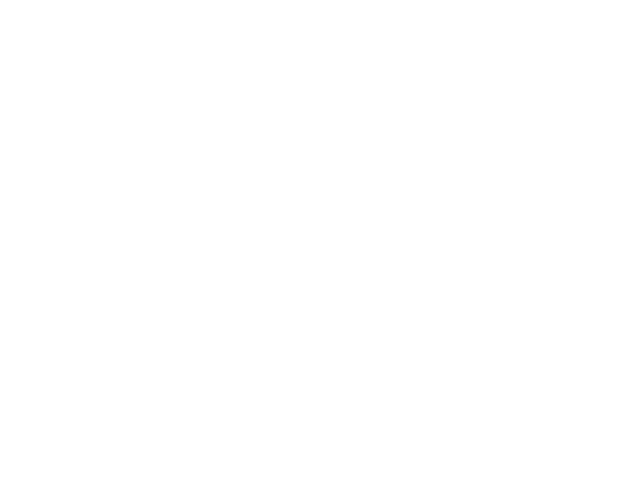

In [2]:
%matplotlib notebook

rsie = 42.44106/1.04
twist = 18.47096  
in_point=np.array([[269],[121],[321]])
p1=in_point-320
print(p1)
ox=[]
oy=[]
oz=[]
for i in range(10):
    p2=(rz(twist).T).dot(p1)
    p2[2]+=rsie
    #print(p2)
    p1=p2
    ox.append(p2[0][0]+320)
    oy.append(p2[1][0]+320)
    oz.append(p2[2][0]+320)
print("OX:",np.array(ox),"\nOY:", np.array(oy),"\nOZ:", np.array(oz))

fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlim(0,640)
ax.set_ylim(0,640)
ax.set_zlim(0,640)
ax.scatter(269,121,321, marker=".")
ax.scatter(ox, oy, oz, marker="*")
plt.show()

C14

<IPython.core.display.Javascript object>


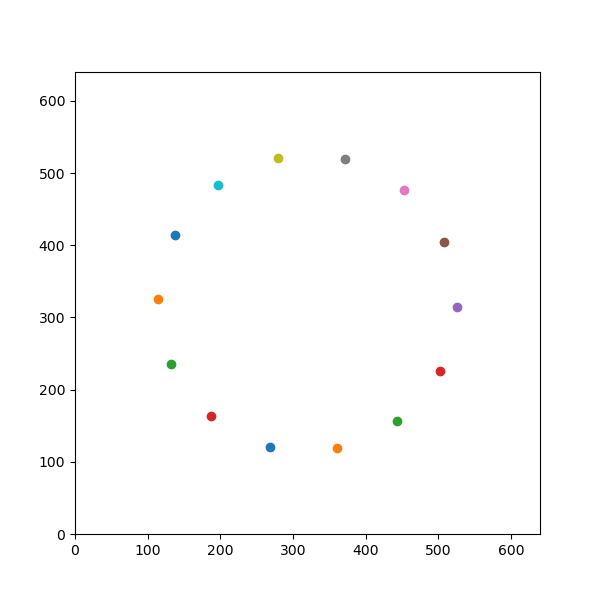

[[269.]
 [121.]
 [320.]]
[[360.39345182]
 [118.57912459]
 [320.        ]]
[[443.78648512]
 [156.05212382]
 [320.        ]]
[[502.66208689]
 [225.99701062]
 [320.        ]]
[[525.35922216]
 [314.56034234]
 [320.        ]]
[[507.38244491]
 [404.20106496]
 [320.        ]]
[[452.29227635]
 [477.16473402]
 [320.        ]]
[[371.]
 [519.]
 [320.]]
[[279.60654818]
 [521.42087541]
 [320.        ]]
[[196.21351488]
 [483.94787618]
 [320.        ]]
[[137.33791311]
 [414.00298938]
 [320.        ]]
[[114.64077784]
 [325.43965766]
 [320.        ]]
[[132.61755509]
 [235.79893504]
 [320.        ]]
[[187.70772365]
 [162.83526598]
 [320.        ]]


In [7]:
%matplotlib notebook

in_point=np.array([[269],[121],[320]])
p1=in_point-320

plt.figure(figsize=(6,6))
for i in range(0,14):
    angle=i*360/14
    op=(rz(angle).T).dot(p1)+320
    print(op)
    plt.scatter(op[0][0],op[1][0])
plt.xlim(0,640)
plt.ylim(0,640)
plt.show()

### 测试
一个点 C14后的投影

先转动点 = 先修改rottation matrix

注意这里最后的xy和oxoy的区别，x=-ox。 因为ox表示particle到refercence的移动距离

In [4]:
%matplotlib notebook

sym="C"
sym_num=14
rot = 116.533127
tilt = 96.133881
psi = 61.409645
ox = -8.39357
oy = -14.3283
in_point = np.array([[269],[121],[320]])
p1 = in_point-320
coor1x,coor1y = [],[]
coor2x,coor2y = [],[]


plt.figure(figsize=(6,6))

def m2a(m):
    rot=

for i in range(0,sym_num):
    angle=i*360/sym_num
    # 先转点
    op=(rz(angle).T).dot(p1)
    rot_coor=rz(psi).dot(ry(tilt)).dot(rz(rot)).dot(op)
    coor1x.append(rot_coor[0][0]-ox+320)
    coor1y.append(rot_coor[1][0]-oy+320)
    #print(rot_coor[0][0]-ox, rot_coor[1][0]-oy)
    # 先转欧拉角
    rot_angle=np.dot(rz(psi).dot(ry(tilt)).dot(rz(rot)),rz(angle).T)
    rot_coor2=rot_angle.dot(p1)
    coor2x.append(rot_coor2[0][0]-ox+320)
    coor2y.append(rot_coor2[1][0]-oy+320)

plt.scatter(coor1x, coor1y)
plt.scatter(coor2x, coor2y, marker='*')
plt.xlim(0,640)
plt.ylim(0,640)
plt.show()

print([round(i-320) for i in coor1x])
print([round(i-320) for i in coor1y])
#print([int(i-320+0.5) for i in coor2x]) # 四舍五入
#print([int(i-320) for i in coor2y])

SyntaxError: invalid syntax (Temp/ipykernel_18932/3750774660.py, line 19)